Цель: Используя данный датасет https://archive.ics.uci.edu/ml/datasets/Wholesale+customers произвести кластеризацию методом k-means. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c1912e8>,
      dtype=object)

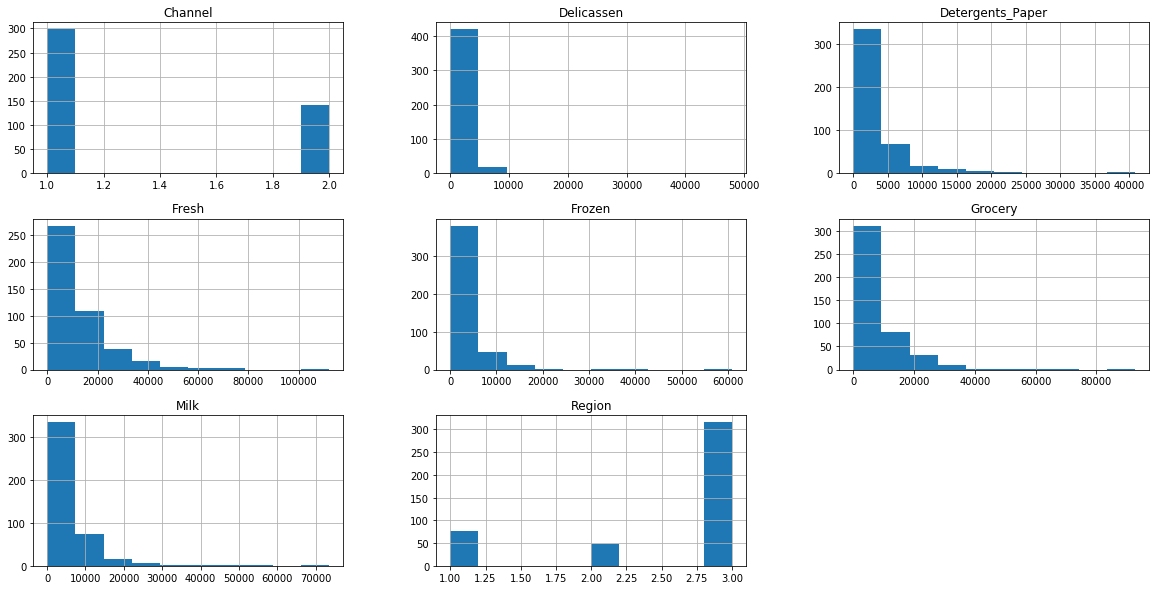

In [5]:
data.hist(figsize = (20,10))

*See:* Outliers, unbalanced data - нужна нормализация

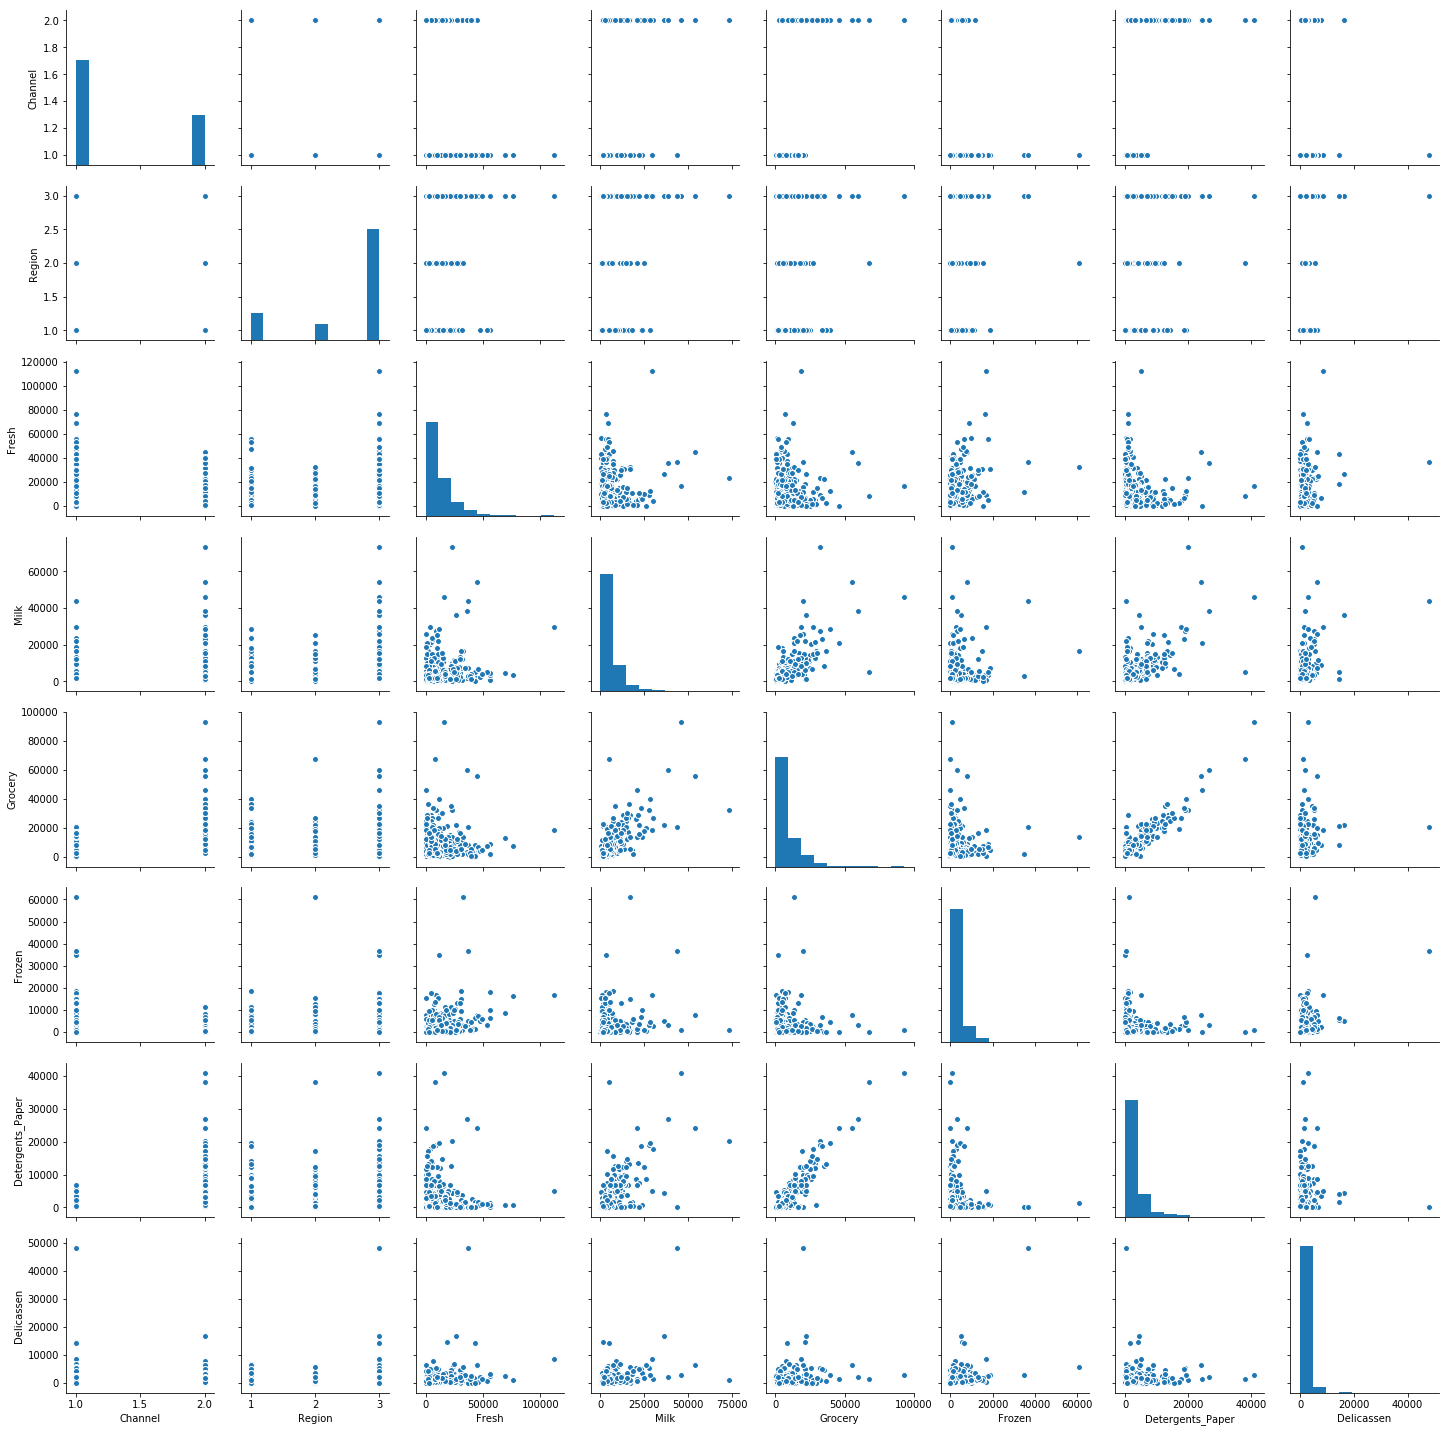

In [6]:
sns.pairplot(data)

? корреляция между Grocery и Detergents_paper

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled = scaler.fit_transform(data)

normalized = normalize(scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized= pd.DataFrame(normalized) 

In [8]:
normalized.head()

,0,1,2,3,4,5,6,7
0,0.825480,0.336578,0.030163,0.298343,-0.023428,-0.335837,-0.024827,-0.037802
1,0.834375,0.340205,-0.225377,0.313590,0.098098,-0.155590,0.049767,0.051348
2,0.515929,0.210363,-0.159207,0.145498,-0.010028,-0.048983,0.047450,0.798935
3,-0.475362,0.406755,0.068940,-0.429722,-0.270618,0.473191,-0.343345,0.064326
4,0.652120,0.265893,0.378239,-0.023587,-0.035723,0.078264,-0.104399,0.584909


In [9]:
# Naive KMeans
km = KMeans(3, n_jobs=-1)
km.fit(normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = km.predict(normalized)

CPU times: user 5.9 s, sys: 112 ms, total: 6.01 s
Wall time: 6.13 s


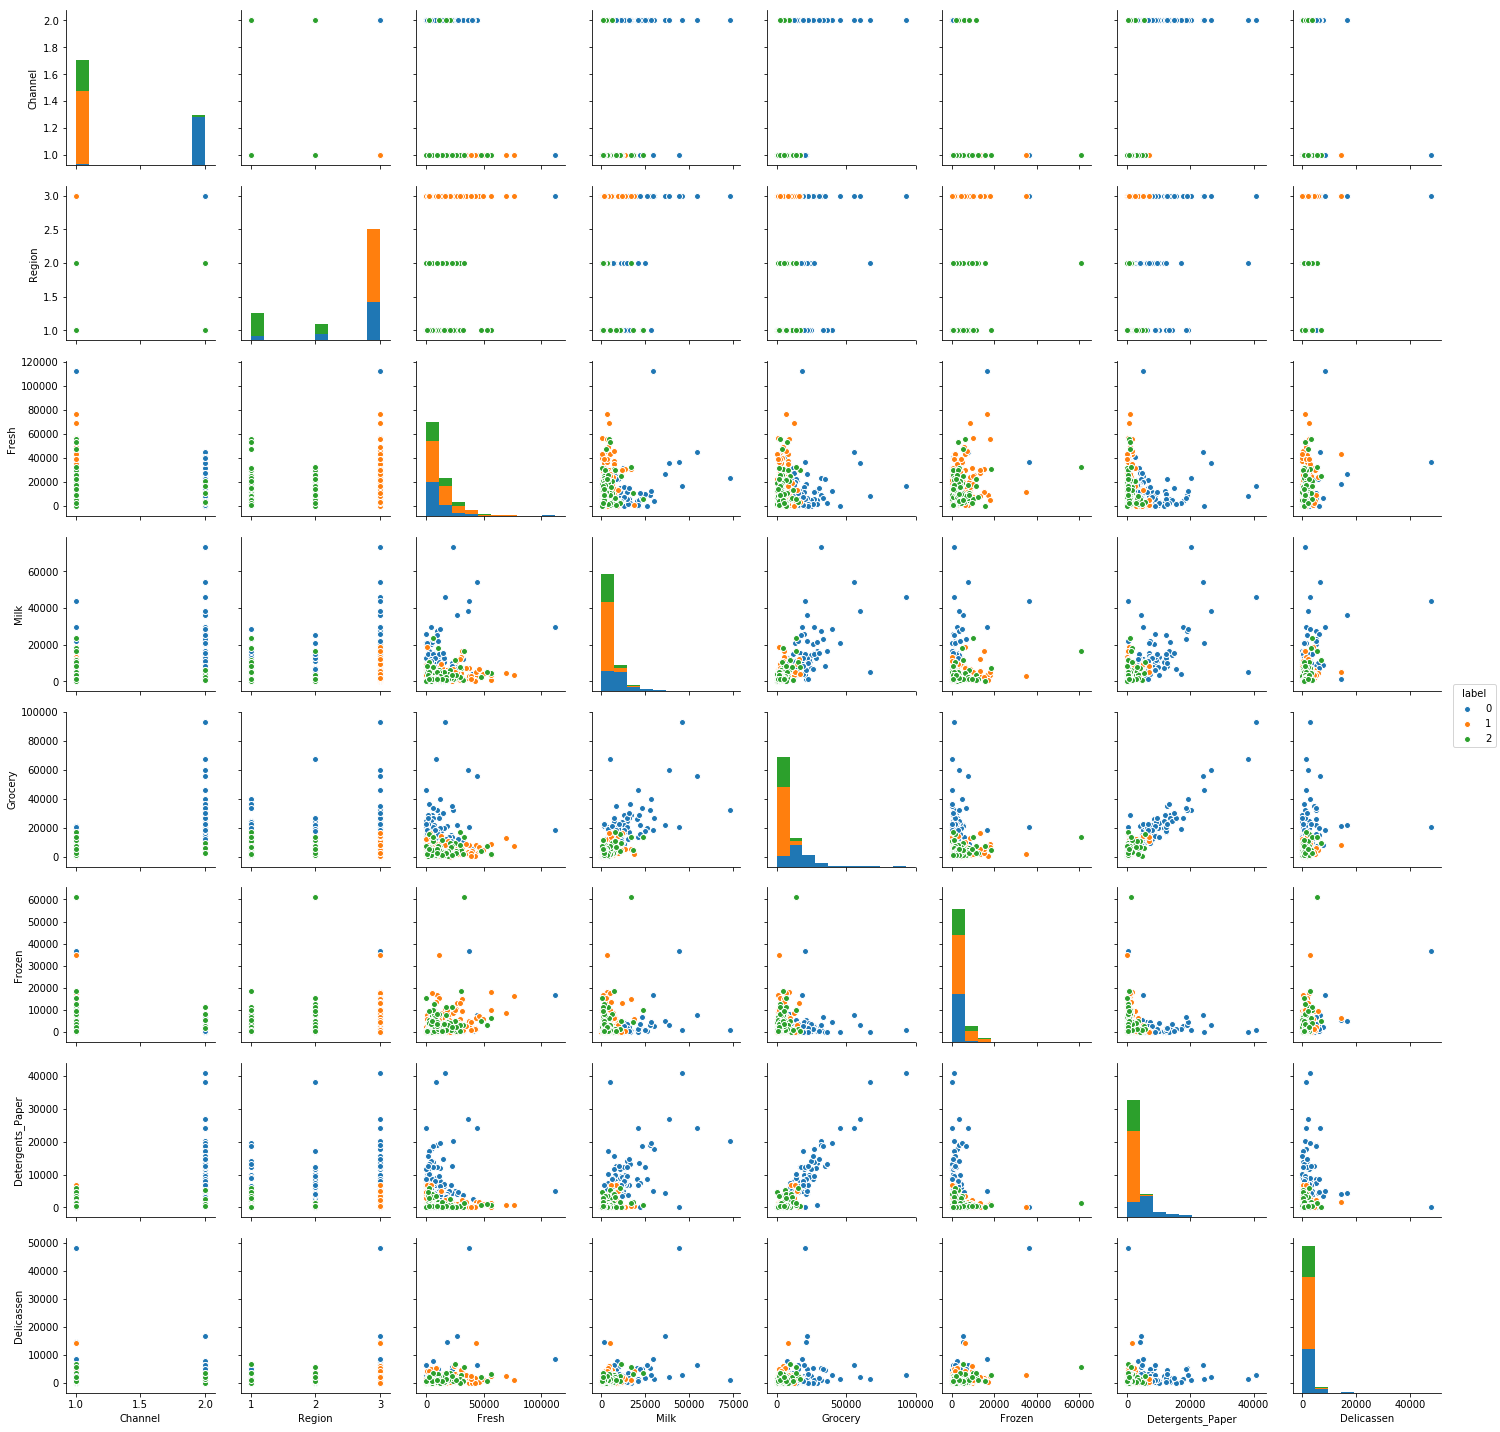

In [11]:
%%time
sns.pairplot(data.join(pd.Series(labels).rename("label")), hue="label", vars=data.columns)

Проверить оптимальное число k с применением *silhouette score методом локтя(elbow).*

**Evaluating the cluster quality**

The goal here isn’t just to make clusters, but to make good, meaningful clusters. Quality clustering is when the datapoints within a cluster are close together, and afar from other clusters.
The two methods to measure the cluster quality are described below:

*Inertia:* Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

*Silhouette score:* Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.

https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a


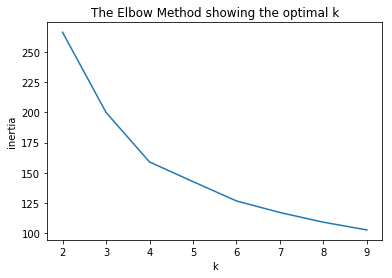

In [12]:
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(normalized)
    inertia.append(km.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k');

Смотря на переломы, то оптимальный  k=4

In [13]:
from sklearn.metrics import silhouette_score
silhouette = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i)
    km.fit(normalized)
    silhouette.append(silhouette_score(normalized, km.predict(normalized)))

Text(0.5,1,'The silhouette scores for each k')

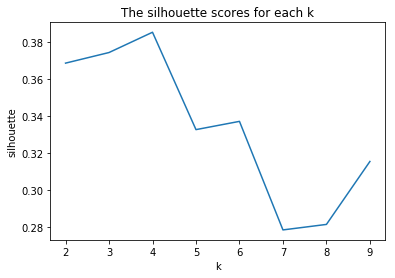

In [14]:
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The silhouette scores for each k')

k = 4 maximizes

### Visualization

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=50)

tsne_transformed = tsne.fit_transform(normalized)

In [25]:
km = KMeans(n_clusters=3).fit(normalized)

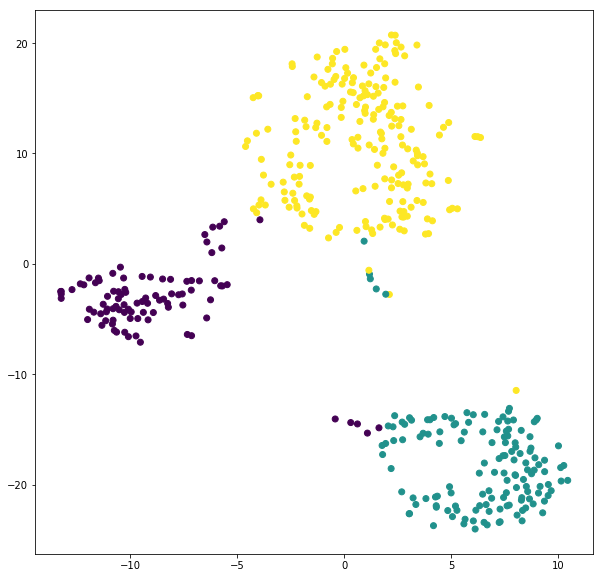

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=km.labels_);

In [ ]:
# Надо попробовать SVM Kernel для того, чтобы еще больше определить кластеры